Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection'

In [4]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset.shape

(1338, 7)

In [9]:
insurance_dataset.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


DATA Analysis

In [12]:
#checking null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-16-d540f2261b13>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


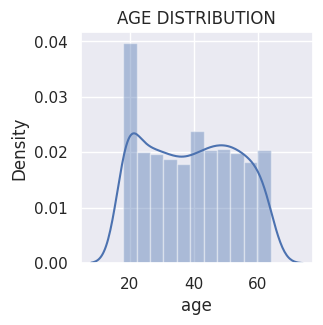

In [16]:
#finding distubution of age
sns.set()
plt.figure(figsize = (3,3))
sns.distplot(insurance_dataset['age'])
plt.title("AGE DISTRIBUTION")
plt.show()

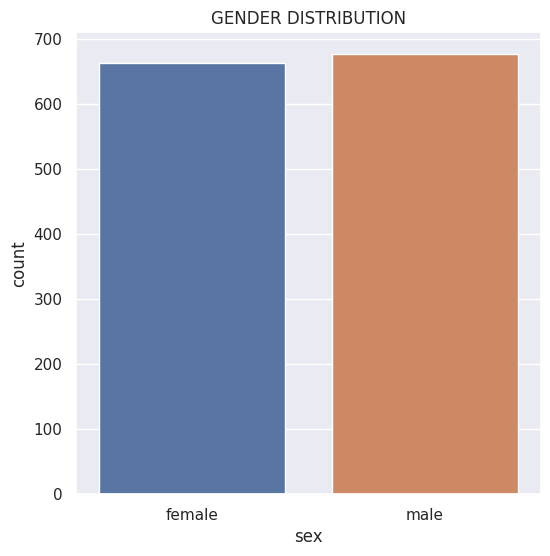

In [21]:
#finding distubution of gender
#this is categorical so cant use distplot
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data= insurance_dataset)
plt.title("GENDER DISTRIBUTION")
plt.show()


In [24]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [26]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Data Pre-Processing

Encoding categorical features

In [28]:
#encoding sex column
insurance_dataset.replace({'sex': {'male':0, 'female':1}}, inplace = True)
#encoding smoker column
insurance_dataset.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)
#encoding region column
insurance_dataset.replace({'region': {'southeast':0, 'northeast':1, 'southwest':2, 'northwest':3}}, inplace = True)

In [29]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting features and target

In [30]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
y = insurance_dataset['charges']

In [31]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,2
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


Splitting data into training and testing data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Model Training

In [34]:
lin_reg_model = LinearRegression()

In [35]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [36]:
train_predict = lin_reg_model.predict(X_train)

In [39]:
error = metrics.r2_score(y_train, train_predict)
print(error)

0.7467333649120853


In [43]:
test_predict = lin_reg_model.predict(X_test)
error2 = metrics.r2_score(y_test, test_predict)
print(error2)

0.7609747830574931


Building predictive System

In [49]:
input_data = (31, 1, 25.74, 0, 1,0)

#changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

[4298.42932306]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
